In [12]:
path_head = r"/home/yong/Downloads/2020_06_17_TS_submarine_13m_head/*.wav"
# filename = r"\S4A02746_20000104_124448.wav"
# file = path + filename
from glob import glob 

In [13]:
filelist_head = glob(path_head)

In [17]:
filelist_head = sorted(filelist_head)

In [18]:
filelist_head

['/home/yong/Downloads/2020_06_17_TS_submarine_13m_head/1710_AI0_3k.wav',
 '/home/yong/Downloads/2020_06_17_TS_submarine_13m_head/1714_AI0_4k.wav',
 '/home/yong/Downloads/2020_06_17_TS_submarine_13m_head/1717_AI0_5k.wav',
 '/home/yong/Downloads/2020_06_17_TS_submarine_13m_head/1722_AI0_6k.wav',
 '/home/yong/Downloads/2020_06_17_TS_submarine_13m_head/1727_AI0_7k.wav',
 '/home/yong/Downloads/2020_06_17_TS_submarine_13m_head/1732_AI0_8k.wav',
 '/home/yong/Downloads/2020_06_17_TS_submarine_13m_head/1736_AI0_9k.wav',
 '/home/yong/Downloads/2020_06_17_TS_submarine_13m_head/1741_AI0_10k.wav']

In [19]:
path_tank = r"/home/yong/Downloads/2020_06_17_TS_submarine_13m_tank/*.wav"

In [20]:
filelist_tank = glob(path_tank)

In [21]:
filelist_tank = sorted(filelist_tank)

In [22]:
filelist_tank

['/home/yong/Downloads/2020_06_17_TS_submarine_13m_tank/2035_AI0_3k.wav',
 '/home/yong/Downloads/2020_06_17_TS_submarine_13m_tank/2040_AI0_4k.wav',
 '/home/yong/Downloads/2020_06_17_TS_submarine_13m_tank/2044_AI0_5k.wav',
 '/home/yong/Downloads/2020_06_17_TS_submarine_13m_tank/2048_AI0_6k.wav',
 '/home/yong/Downloads/2020_06_17_TS_submarine_13m_tank/2053_AI0_7k.wav',
 '/home/yong/Downloads/2020_06_17_TS_submarine_13m_tank/2058_AI0_8k.wav',
 '/home/yong/Downloads/2020_06_17_TS_submarine_13m_tank/2102_AI0_9k.wav',
 '/home/yong/Downloads/2020_06_17_TS_submarine_13m_tank/2106_AI0_10k.wav']

In [23]:
# from scipy.io import wavfile (do not support 24bits depth)
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib notebook

In [26]:
class SL():
    def __init__(self, file):
        self.file = file
        self.bits = 24
        self.range = 2
#         title = self.file.split('\\')[-1].split('.')[0].split('_')
        title = self.file.split('/')[-1].split('.')[0].split('_')
        self.plot_title = title[1] + "_" + title[2]
        self.freq = title[2]
        print("title: {}".format(self.plot_title))
    def readWavFileToArray(self):
#         fp = open(self.file, 'r')
#         self.fs, self.values = wavfile.read(self.file)
#         self.values = self.values*(self.range/pow(2,self.bits))
        self.values, self.fs = sf.read(self.file)
        self.length = len(self.values)
        self.time = np.arange(self.length)/self.fs
        print("total lenght: {}, time duration: {}".
              format(self.length, self.length//self.fs))
    def plot(self):
        plt.plot(self.time, self.values)
        plt.title(self.plot_title)
    def findPeakIndex(self, threshold):
        mask = ((self.values[1:-1]-self.values[2:])>0)*((self.values[1:-1]-self.values[:-2])>0)*(self.values[1:-1]>threshold)
        self.indexs = []
        for index, i in enumerate(mask):
            if(i):
                self.indexs.append(index+1)
        count=1
        self.indexs = np.array(self.indexs)
        diff = self.indexs[1:]-self.indexs[:-1]
        
        start_skip=0
        end_skip=1
        self.category=[]
        self.category.append(self.indexs[start_skip])
        for index, value in enumerate(diff):
            if value>self.fs:
                count+=1
                self.category.append(self.indexs[index-end_skip])
                self.category.append(self.indexs[index+1+start_skip])
        self.category.append(self.indexs[-(1+end_skip)])
        print("total sound generated: {}".format(count))
    def plotWithPeak(self):
        fig, ax = plt.subplots()
        ax.plot(self.time, self.values)
        ax.plot(self.time[self.indexs], self.values[self.indexs], 'o')
        ax.set_title(self.plot_title)
        fig.tight_layout()
    def plotWithFilterPeak(self):
        fig, ax = plt.subplots()
        ax.plot(self.time, self.values)
        ax.plot(self.time[self.category], self.values[self.category], 'o')
        ax.set_title(self.plot_title)
        fig.tight_layout()
    
    def rms(self, x):
        return np.sqrt(np.mean(x*x))
    def calculateSL(self):
        self.sen = -207
        length = len(self.category)
        print()
        if (length%2==0 and length>0):
            self.SL=[]
            for i in range(length//2):
                start = self.category[2*i]
                end = self.category[2*i+1]
                v = self.rms(self.values[start:end])
                sl = 20*math.log10(v)-self.sen
                self.SL.append(sl)
        else:
            print("the peak is wrong or empty, check the plot with peak")
    def getSL(self):
        return self.SL
    def getData(self):
        return self.values
    def getIndex(self):
        return self.indexs
    def getTime(self):
        return self.time

In [14]:
# SL_raw = {}
# SL_report = {}
# for index, file in enumerate(filelist):
#     if index%2==0:
#         threshold = 0.12
#     else:
#         threshold = 0.06
#     a = SL(file)
#     a.readWavFileToArray()
#     a.findPeakIndex(threshold)
#     a.calculateSL()
#     data = a.getSL()
#     SL_raw[a.plot_title]=data
    
#     sl = np.array(data)
#     SL_report[a.plot_title]=(np.mean(sl))

In [11]:
filelist_head

['/home/yong/Downloads/2020_06_17_TS_submarine_13m_head/1727_AI0_7k.wav',
 '/home/yong/Downloads/2020_06_17_TS_submarine_13m_head/1714_AI0_4k.wav',
 '/home/yong/Downloads/2020_06_17_TS_submarine_13m_head/1736_AI0_9k.wav',
 '/home/yong/Downloads/2020_06_17_TS_submarine_13m_head/1710_AI0_3k.wav',
 '/home/yong/Downloads/2020_06_17_TS_submarine_13m_head/1741_AI0_10k.wav',
 '/home/yong/Downloads/2020_06_17_TS_submarine_13m_head/1732_AI0_8k.wav',
 '/home/yong/Downloads/2020_06_17_TS_submarine_13m_head/1722_AI0_6k.wav',
 '/home/yong/Downloads/2020_06_17_TS_submarine_13m_head/1717_AI0_5k.wav']

title: AI0_5k
total lenght: 27025000, time duration: 263


<IPython.core.display.Javascript object>


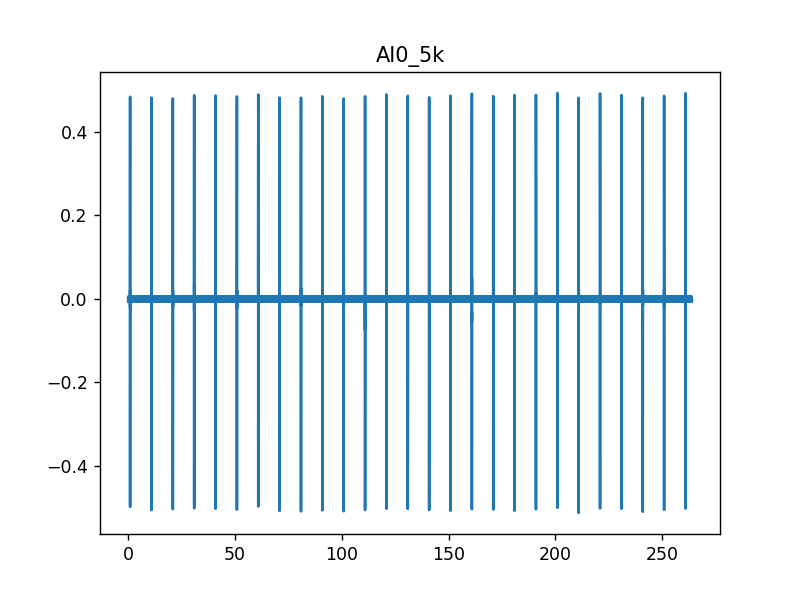

In [27]:
%matplotlib notebook
b = SL(filelist_head[2])
b.readWavFileToArray()
b.plot()

title: AI0_5k
total lenght: 25500000, time duration: 249


<IPython.core.display.Javascript object>


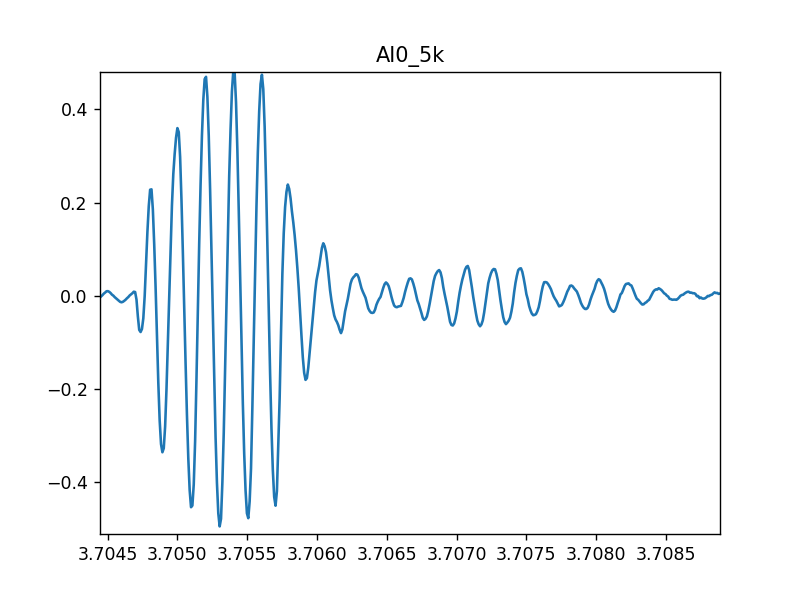

In [29]:
a = SL(filelist_tank[2])
a.readWavFileToArray()
a.plot()

In [30]:
b.findPeakIndex(0.2)
# b.plotWithFilterPeak()
# b.calculateSL()

total sound generated: 27


In [31]:
a.findPeakIndex(0.2)
# a.plotWithFilterPeak()
# a.calculateSL()

total sound generated: 25


In [32]:
index_head = b.getIndex()
index_tank = a.getIndex()

In [33]:
print("index_head number: {}".format(len(index_head)))
print("index_tank number: {}".format(len(index_tank)))

index_head number: 162
index_tank number: 150


In [34]:
162/27

6.0

In [35]:
150/25

6.0

In [24]:
diff = index_tank[5*5:5*15]-index_head[5*5:5*15]
diff

array([-731415, -731416, -731416, -731415, -731416, -731416, -731415,
       -731416, -731416, -731415, -731416, -731416, -731415, -731416,
       -731416, -731415, -731416, -731416, -731415, -731416, -731416,
       -731415, -731416, -731416, -731415, -731416, -731416, -731415,
       -731416, -731416, -731415, -731416, -731415, -731415, -731416,
       -731416, -731415, -731416, -731415, -731415, -731415, -731416,
       -731415, -731416, -731415, -731415, -731415, -731416, -731415,
       -731416])

In [23]:
len(index_head)

162

In [36]:
data_head = b.getData()
data_tank = a.getData()

In [37]:
time_head = b.getTime()
time_tank = a.getTime()

<IPython.core.display.Javascript object>


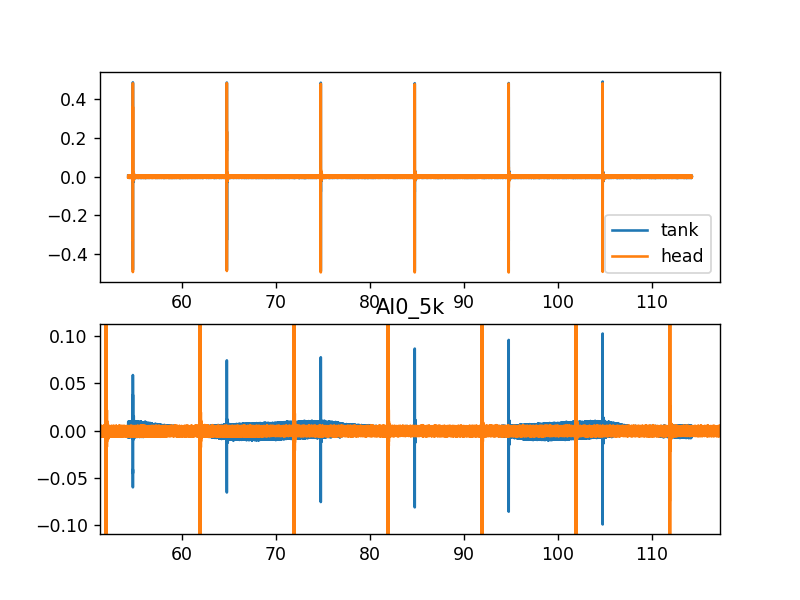

In [30]:
fig, ax = plt.subplots(2,1)
fs = 102400
time_tank_start = int(index_tank[6*5]-fs*0.5)
time_head_start = int(index_head[6*5]-fs*0.5)
end_tank = time_tank_start+fs*60
end_head = time_head_start+fs*60
shift=0
ax[0].plot(time_tank[time_tank_start+shift:end_tank], data_tank[time_tank_start+shift:end_tank], label="tank")
ax[0].plot(time_tank[time_tank_start+shift:end_tank], data_head[time_head_start:end_head-shift], label="head")
ax[1].plot(time_tank[time_tank_start:end_tank], data_head[time_head_start:end_head]-data_tank[time_tank_start:end_tank], label="head-tank")
ax[0].legend(loc=4)
# fig.tight_layout()

In [34]:
len(index_head)/6

24.0

In [35]:
len(index_tank)/6

25.0

In [39]:
index_tank = index_tank[6:]
len(index_tank)

144

In [39]:
fs = 102400
start_head = int(index_head[0]-0.01*fs)
end_head = int(start_head + fs*0.11)
start_tank = int(index_tank[0]-0.01*fs)
end_tank = int(start_tank + fs*0.11)

add_head = data_head[start_head:end_head]
add_tank = data_tank[start_tank:end_tank]
for i in range(1, 24):
    start_head = int(index_head[6*i]-0.01*fs)
    end_head = int(start_head + fs*0.11)
    start_tank = int(index_tank[6*i]-0.01*fs)
    end_tank = int(start_tank + fs*0.11)
    
    head = data_head[start_head:end_head]
    tank = data_tank[start_tank:end_tank]
    
    add_head = add_head + head
    add_tank = add_tank + tank

<IPython.core.display.Javascript object>


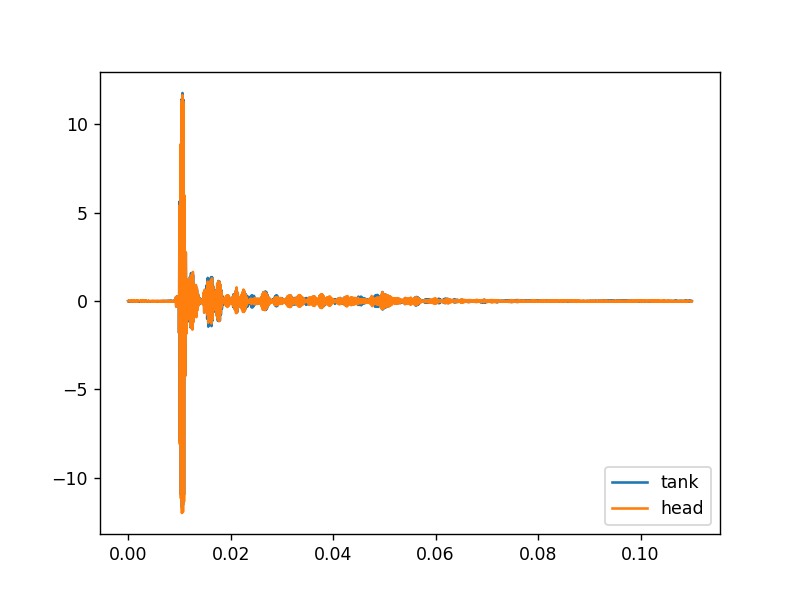

In [40]:
fig, ax = plt.subplots()
fs = 102400
time = np.arange(len(add_head))/fs

ax.plot(time, add_tank, label="tank")
ax.plot(time, add_head, label="head")
# ax[1].plot(time_tank[time_tank_start:end_tank], data_head[time_head_start:end_head]-data_tank[time_tank_start:end_tank], label="head-tank")
ax.legend(loc=4)
# fig.tight_layout()

In [62]:
def findPeakIndex(x):
    fs = 102400
    mask = ((x[1:-1]-x[2:])>0)*((x[1:-1]-x[:-2])>0)
    indexs = []
    for index, i in enumerate(mask):
        if(i):
            indexs.append(index+1)
    count=1
    indexs = np.array(indexs)
#     diff = indexs[1:]-indexs[:-1]

#     start_skip=0
#     end_skip=0
#     category=[]
#     category.append(indexs[start_skip])
#     for index, value in enumerate(diff):
#         if value>1/f*7*fs:
#             count+=1
#             category.append(indexs[index-end_skip])
#             category.append(indexs[index+1+start_skip])
#     category.append(indexs[-(1+end_skip)])
#     print("total sound generated: {}".format(count))
    return indexs
    

In [77]:
def findPeakIndexIndex(x, i_x):
    fs = 102400
    mask = ((x[1:-1]-x[2:])>0)*((x[1:-1]-x[:-2])>0)
    indexs = []
    for index, i in enumerate(mask):
        if(i):
            indexs.append(index+1)
    count=1
    indexs = np.array(indexs)
    return i_x[indexs]

In [83]:
fs = 102400
end = int(fs*0.03)
i_h = findPeakIndex(add_head[:end])
i_t = findPeakIndex(add_tank[:end])

In [84]:
i_h

array([   3,    6,    8,   10,   13,   15,   20,   25,   28,   30,   32,
         34,   37,   39,   41,   46,   48,   51,   54,   56,   59,   61,
         63,   65,   67,   70,   72,   75,   79,   81,   84,   88,   90,
         92,   97,  101,  103,  105,  107,  110,  112,  115,  117,  119,
        124,  127,  129,  131,  134,  136,  141,  146,  148,  151,  153,
        155,  158,  161,  163,  165,  167,  171,  175,  177,  179,  181,
        184,  187,  189,  191,  194,  199,  201,  204,  207,  210,  212,
        215,  217,  221,  224,  228,  233,  235,  237,  241,  243,  246,
        251,  256,  258,  260,  266,  270,  275,  277,  280,  282,  284,
        289,  293,  298,  302,  307,  309,  311,  314,  316,  318,  323,
        326,  328,  331,  333,  336,  338,  341,  345,  350,  355,  360,
        364,  370,  372,  374,  376,  378,  380,  383,  385,  390,  392,
        396,  401,  404,  409,  414,  419,  423,  427,  432,  435,  440,
        444,  448,  450,  455,  459,  462,  464,  4

In [85]:
i_h_h = findPeakIndexIndex(add_head[i_h], i_h)

In [44]:
x = data_head
mask = ((x[1:-1]-x[2:])>0)*((x[1:-1]-x[:-2])>0)


In [53]:
def plotWithPeak(x, ix, y, iy):
    fs = 102400
    fig, ax = plt.subplots()
    time = np.arange(len(x))/fs
    ax.plot(time, x)
    ax.plot(time[ix], x[ix], 'o')
    ax.plot(time, y)
    ax.plot(time[iy], y[iy], 'o')
    ax.set_title("compare with target & without target difference")
    fig.tight_layout()

In [55]:
def plotWithPeak(x, ix):
    fs = 102400
    fig, ax = plt.subplots()
    time = np.arange(len(x))/fs
    ax.plot(time, x)
    ax.plot(time[ix], x[ix], 'o')
#     ax.plot(time, y)
#     ax.plot(time[iy], y[iy], 'o')
    ax.set_title("compare with target & without target difference")
    fig.tight_layout()

<IPython.core.display.Javascript object>


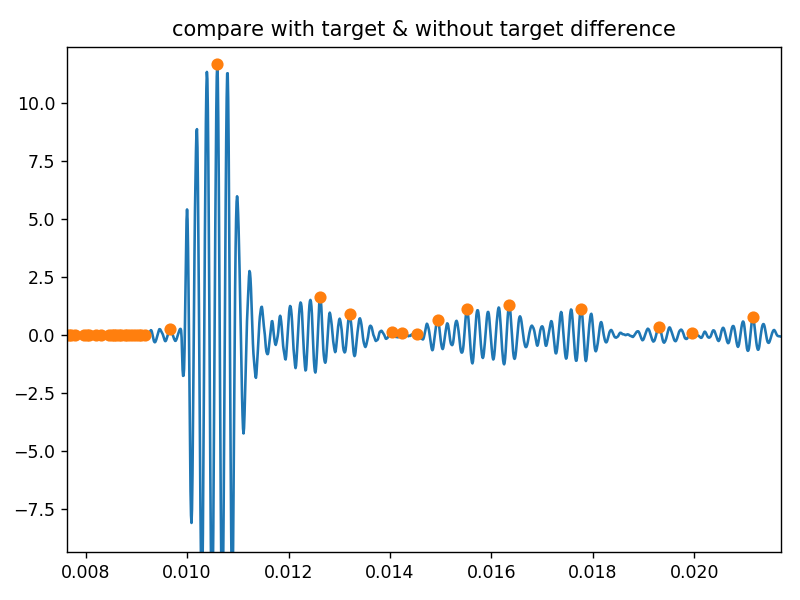

In [86]:
plotWithPeak(add_head, i_h_h)

In [87]:
np.argmax(add_head[i_h_h])

105

In [88]:
len(i_h_h)

127

In [90]:
(i_h_h[105:]-i_h_h[105])/102400*1000    

array([ 0.        ,  2.03125   ,  2.60742188,  3.4375    ,  3.6328125 ,
        3.9453125 ,  4.34570312,  4.921875  ,  5.75195312,  7.16796875,
        8.70117188,  9.35546875, 10.55664062, 11.89453125, 12.8125    ,
       13.046875  , 13.33007812, 13.96484375, 15.96679688, 17.37304688,
       18.4765625 , 19.12109375])

In [91]:
np.array([2.18, 2.235, 2.878, 2])-0.67

array([1.51 , 1.565, 2.208, 1.33 ])